# D206 PA code - Doug Haunsperger
### Do initial package import and data read

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('medical_raw_data.csv')

#view first 5 rows
df.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


### Show variable names, non-null counts using `info()`

In [2]:
df.info()
df.isnull().sum()[df.isnull().sum() > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

## Check for duplicate data
First, check for duplicate rows

In [3]:
df.duplicated().value_counts()

False    10000
dtype: int64

Check to see if there are any duplicate `Customer_id` values, perhaps with different data entered

In [4]:
df.duplicated(subset = ['Customer_id'], keep = False).value_counts()

False    10000
dtype: int64

Now we notice in the `head()` above that the first two columns are suspiciously the same. Let's check to see if the column is completely duplicated:

In [5]:
df[df['Unnamed: 0'] == df['CaseOrder']].shape

(10000, 53)

In [6]:
df[df['Unnamed: 0'] != df['CaseOrder']].shape

(0, 53)

## Check for missing values
Null values already shown in `info()` cell [2] above. Here we will visualize them. In the data treatment section, we will try to determine if the missing values are MAR/MCAR/MNAR.<br>
Code to install package in Jupyter environment taken from Jake VanderPlas (2017).

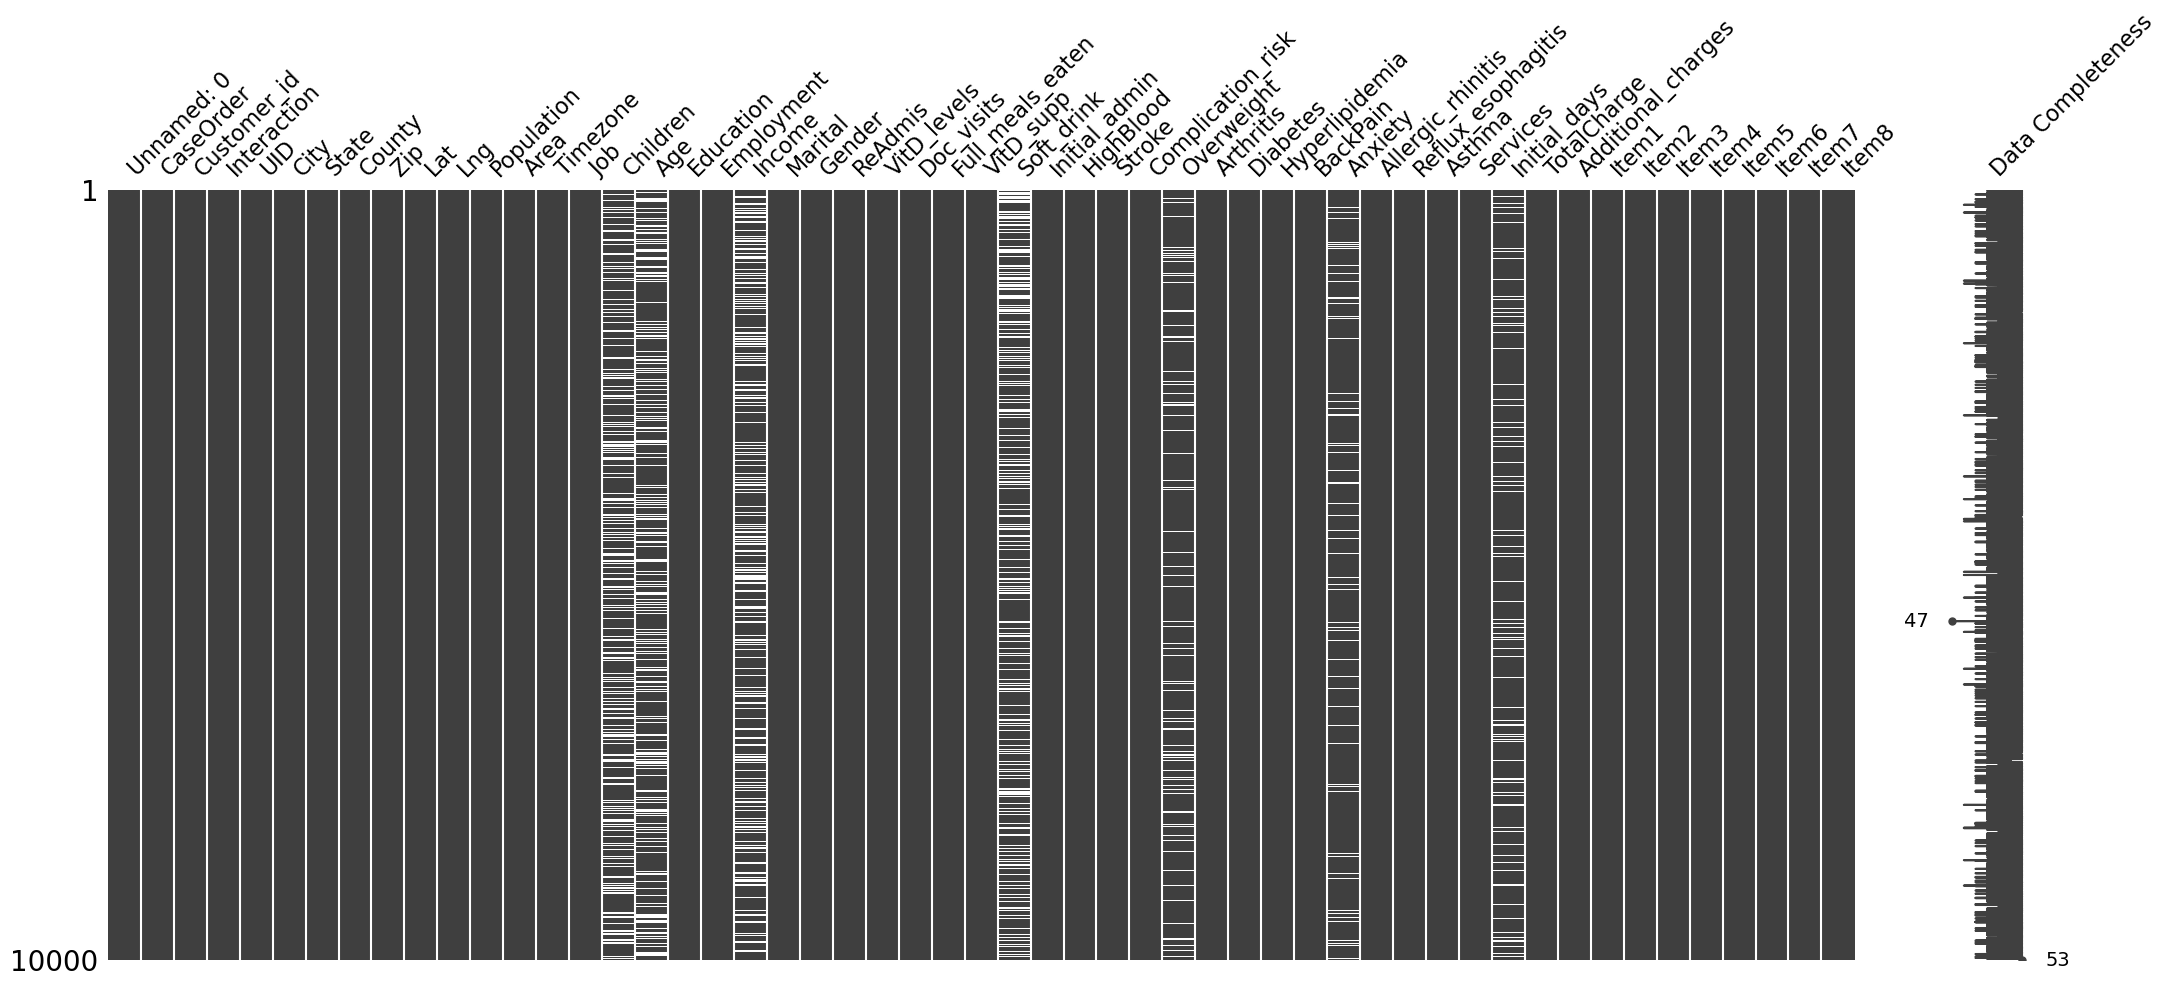

In [7]:
# Install package if needed for environment
# import sys
# !{sys.executable} -m pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df, labels=True) # matrix function turns off labels by default when # columns > 50
# See https://github.com/ResidentMario/missingno/issues/93 (Bilogur, 2019)
plt.show()

We see we have missing values in the columns `Children`, `Age`, `Income`, `Soft_drink`, `Overweight`, `Anxiety`, and `Initial_days`. <br>`Children`, `Age`, `Income`, and `Soft_drink` have the most missing values; each have on the order of 25% of the observations missing.

## Check for outliers

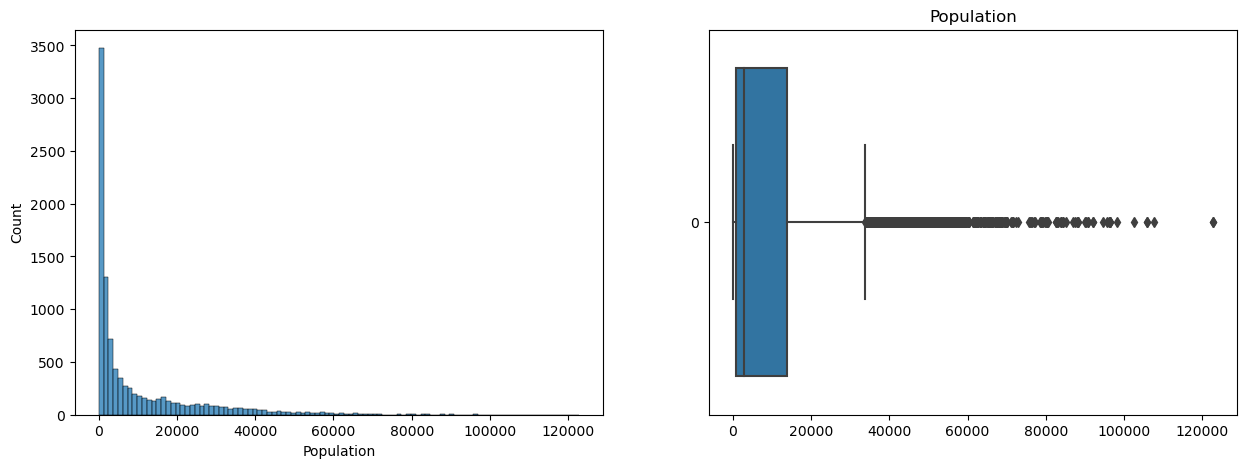

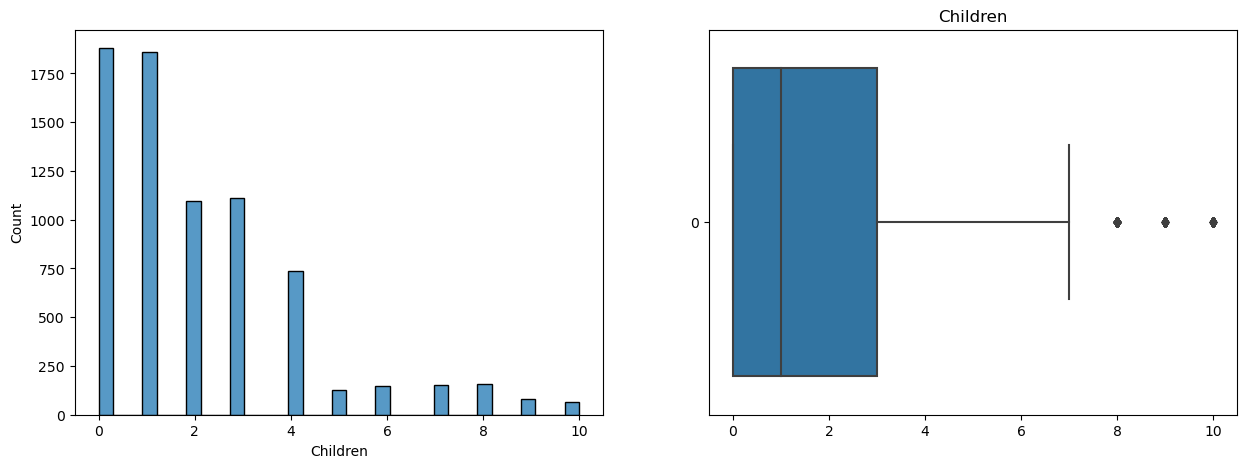

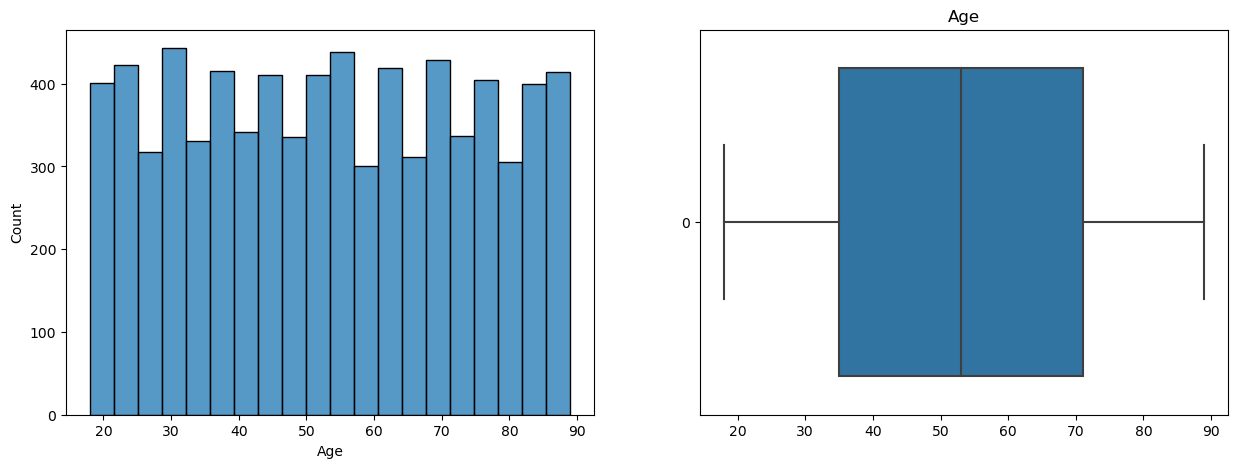

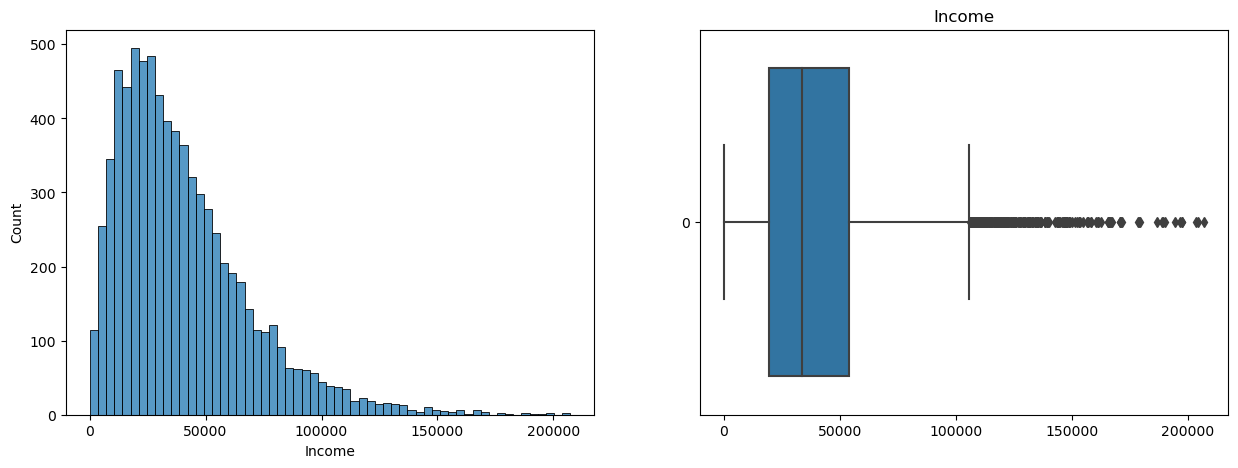

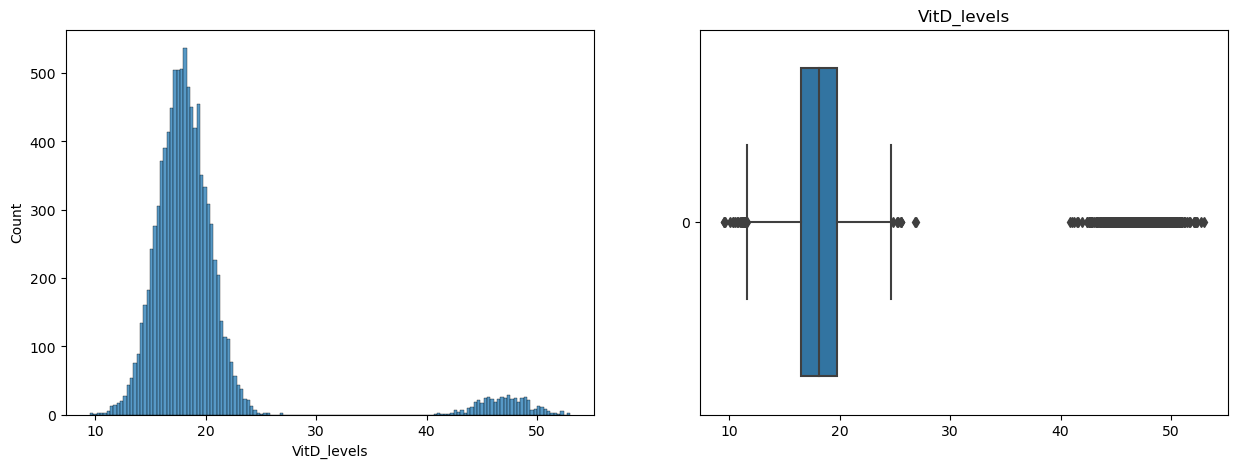

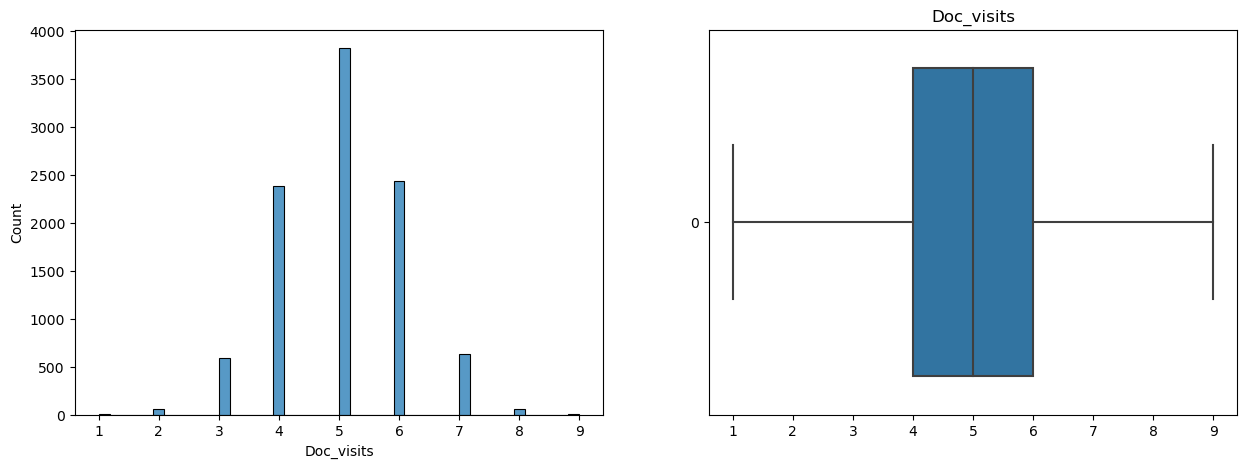

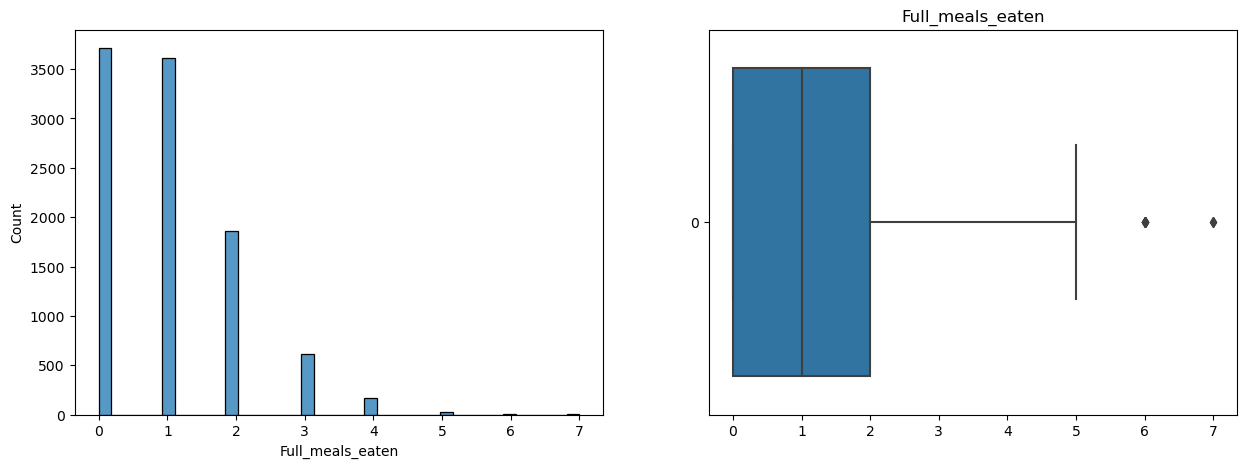

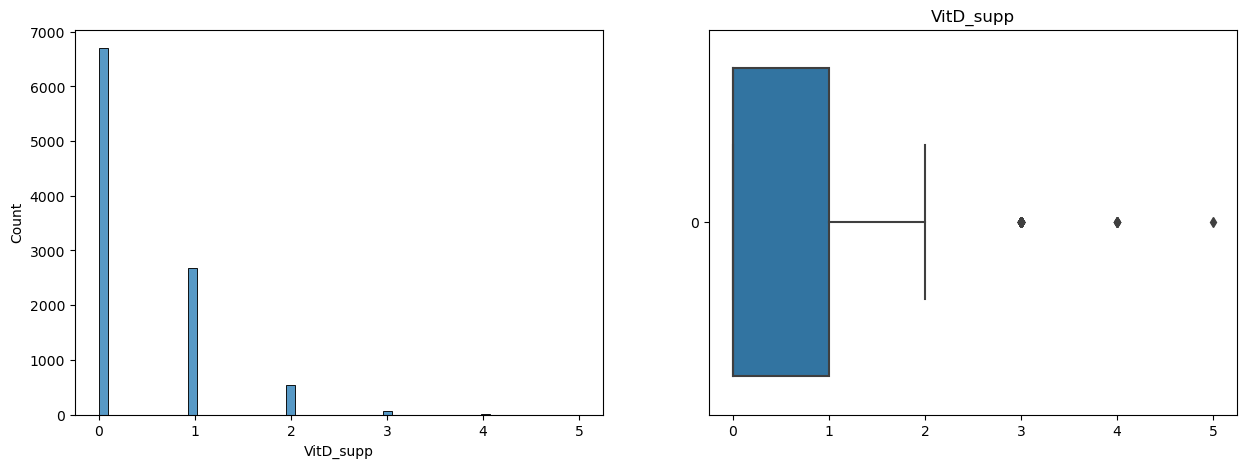

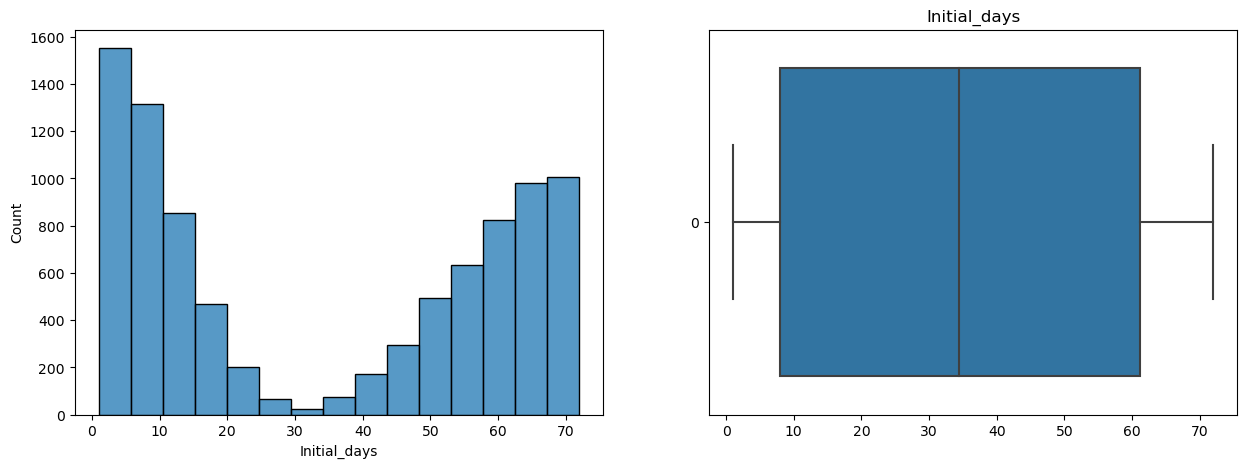

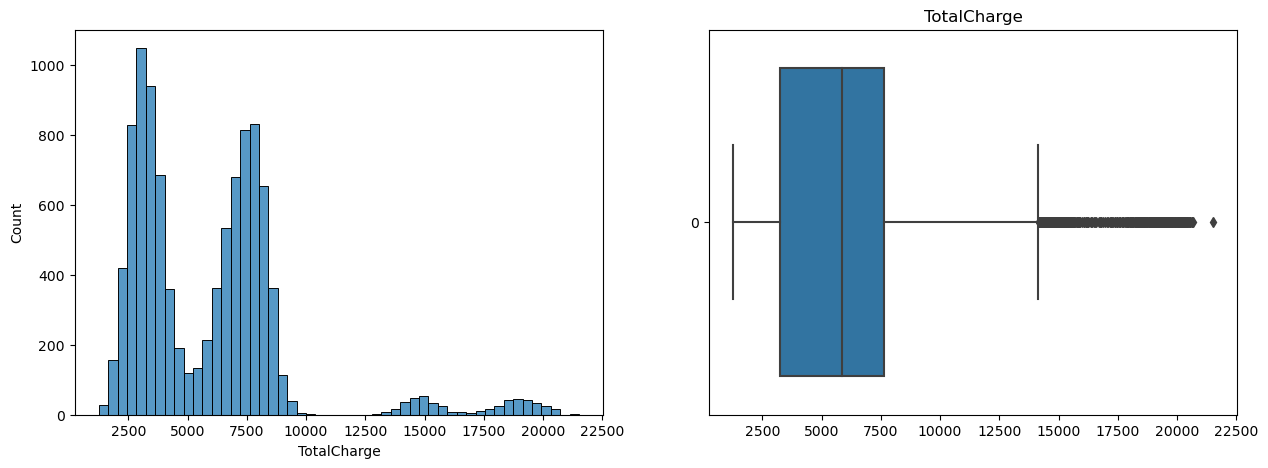

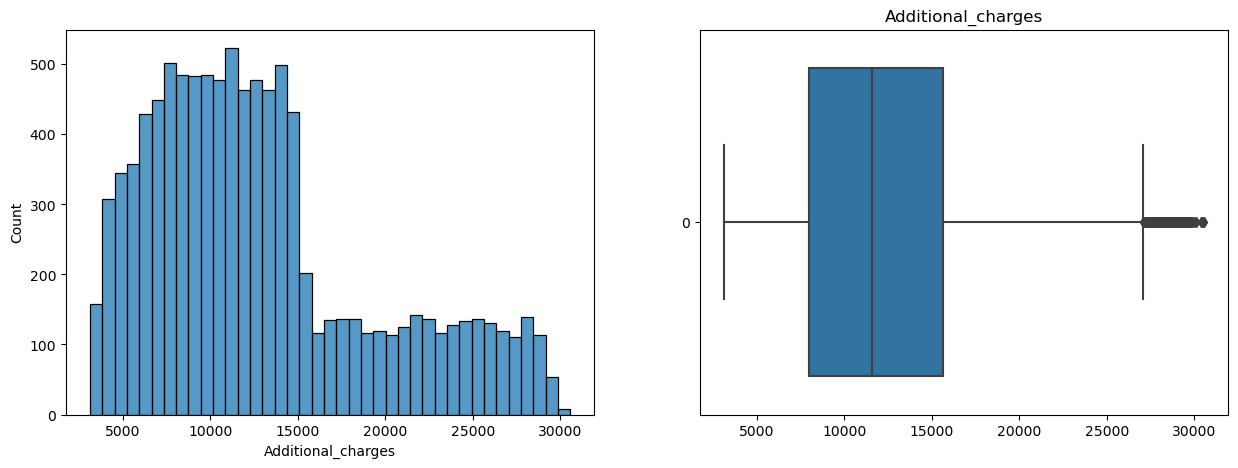

In [8]:
import seaborn
# Choose only the quantitative columns
quant_cols=['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

# Ref: https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell (Kassies, 2013)
for col in quant_cols:
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    seaborn.histplot(df[col], ax=axs[0])
    plt.title(col)
    seaborn.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

## Re-expressing Categorical Variables

Per the PA Guide, I am ignoring the index/ID/location variables.

In [9]:
cat_cols = ['Area', 'Education', 'ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
            'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Overweight', 'Anxiety', 'Item1', 'Item2', 'Item3', 'Item4', 
            'Item5', 'Item6', 'Item7', 'Item8']
for col in cat_cols:
    print(df[col].unique())

['Suburban' 'Urban' 'Rural']
['Some College, Less than 1 Year'
 'Some College, 1 or More Years, No Degree'
 'GED or Alternative Credential' 'Regular High School Diploma'
 "Bachelor's Degree" "Master's Degree" 'Nursery School to 8th Grade'
 '9th Grade to 12th Grade, No Diploma' 'Doctorate Degree'
 "Associate's Degree" 'Professional School Degree'
 'No Schooling Completed']
['No' 'Yes']
[nan 'No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Medium' 'High' 'Low']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
[ 0.  1. nan]
[ 1. nan  0.]
[3 2 4 1 5 7 6 8]
[3 4 5 1 2 6 7]
[2 3 4 5 1 6 7 8]
[2 4 3 5 6 1 7]
[4 3 5 2 6 1 7]
[3 4 5 2 6 1 7]
[3 5 4 2 6 1 7]
[4 3 5 6 2 1 7]


Set up dictionaries based on the above unique values in the data set. Code adapted from Larose & Larose (2019).

In [10]:
dict_area = {"Rural": 1, "Suburban": 2, "Urban": 3}
dict_edu = {"No Schooling Completed": 0, "Nursery School to 8th Grade": 8, "9th Grade to 12th Grade, No Diploma": 10, "Regular High School Diploma": 12, 
            "GED or Alternative Credential": 12, "Professional School Degree": 12, "Some College, Less than 1 Year": 12, "Some College, 1 or More Years, No Degree": 13,
            "Associate's Degree": 14, "Bachelor's Degree": 16, "Master's Degree": 18, "Doctorate Degree": 20}
dict_compl = {"Low": 1, "Medium": 2, "High": 3}
dict_yn = {"Yes": 1, "No": 0}
replace_dict = {'Area': dict_area, 'Education': dict_edu, 'ReAdmis': dict_yn, 'Soft_drink': dict_yn, 'HighBlood': dict_yn, 'Stroke': dict_yn, 'Complication_risk':dict_compl, 
                'Arthritis': dict_yn, 'Diabetes': dict_yn, 'Hyperlipidemia': dict_yn, 'BackPain': dict_yn, 'Allergic_rhinitis': dict_yn, 'Reflux_esophagitis': dict_yn, 'Asthma': dict_yn}
# Overweight, Anxiety, and Item[1-8] are already expressed ordinally
# Make copy to keep original df
df_orig = df.copy(deep = True)
df.replace(replace_dict, inplace = True)

Re-check unique vals to make sure all categoricals have been re-expressed

In [11]:
for col in cat_cols:
    print(df[col].unique())

[2 3 1]
[12 13 16 18  8 10 20 14  0]
[0 1]
[nan  0.  1.]
[1 0]
[0 1]
[2 3 1]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[ 0.  1. nan]
[ 1. nan  0.]
[3 2 4 1 5 7 6 8]
[3 4 5 1 2 6 7]
[2 3 4 5 1 6 7 8]
[2 4 3 5 6 1 7]
[4 3 5 2 6 1 7]
[3 4 5 2 6 1 7]
[3 5 4 2 6 1 7]
[4 3 5 6 2 1 7]


# Data Cleaning

## Treating Duplicates

#### Drop the duplicated column

In [12]:
df = df.drop(columns=['Unnamed: 0'])
df.tail(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01593,...,8462.831883,7781.678412,5,5,3,4,4,3,4,3
9999,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,...,8700.856021,11643.189930,4,3,3,2,3,6,4,3


## Treating Outliers

#### Population
See if Population distribution makes sense given Area descriptions

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64


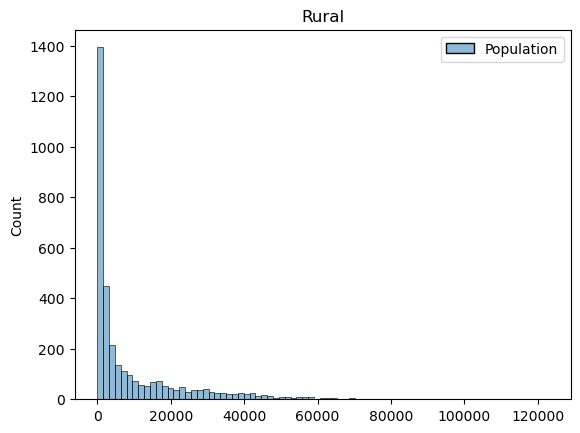

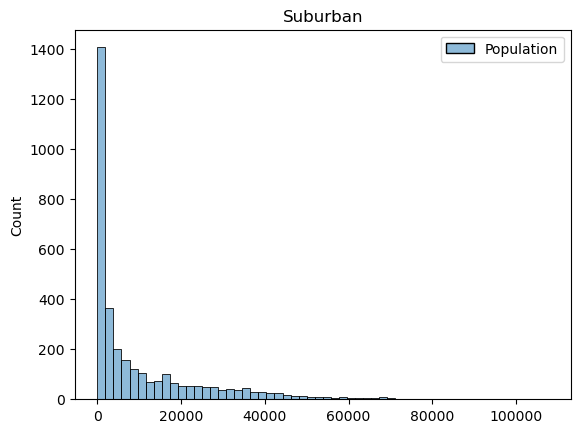

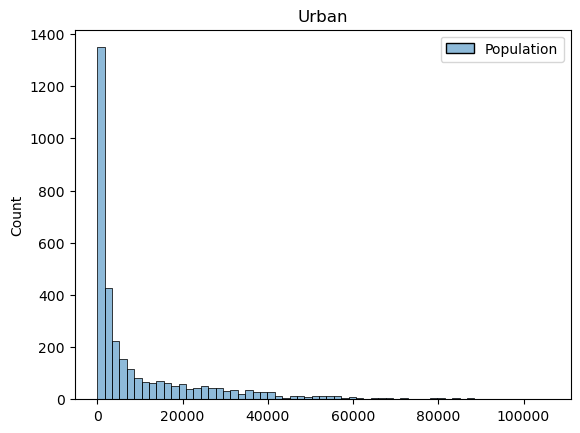

In [13]:
print(df['Population'].describe())
seaborn.histplot(df.loc[(df['Area'] == 1),['Population']]).set(title='Rural')
plt.show()
seaborn.histplot(df.loc[(df['Area'] == 2),['Population']]).set(title='Suburban')
plt.show()
seaborn.histplot(df.loc[(df['Area'] == 3),['Population']]).set(title='Urban')
plt.show()

In [14]:
df.loc[(df['Population'] < 100),['Population', 'Area']]

,Population,Area
31,12,3
42,0,1
44,0,2
60,34,1
86,0,1
...,...,...
9831,97,1
9862,0,1
9876,77,1
9893,80,3


Leaving `Population` outliers in the data set

#### Children

Exclude rows reporting 8 or more children as outliers - move them to a separate data frame. (Middleton, n.d.)

In [15]:
chil_outliers = df[(df['Children'] >= 8)]
df.drop(df[(df['Children'] >= 8)].index, inplace=True)
df.shape

(9697, 52)

#### Age

Uniform distribution - no outliers

#### Income

Outlying values are within reason. Income levels of $207,000/year are expected in a population.

In [16]:
df['Income'].describe()

count      7313.00000
mean      40501.02393
std       28596.87336
min         300.79000
25%       19479.99000
50%       34015.49000
75%       54176.03000
max      207249.13000
Name: Income, dtype: float64

#### VitD_levels

In [17]:
print(df.loc[(df['VitD_levels'] > 35), 'VitD_levels'].describe())

print(df.loc[(df['VitD_levels'] < 35), 'VitD_levels'].describe())


count    485.000000
mean      47.051970
std        2.189405
min       40.841671
25%       45.446696
50%       47.027653
75%       48.596254
max       53.019124
Name: VitD_levels, dtype: float64
count    9212.000000
mean       17.954271
std         2.246511
min         9.519012
25%        16.425299
50%        17.933263
75%        19.461138
max        26.908236
Name: VitD_levels, dtype: float64


In [18]:
# Scale recorded values above 35 by factor of 2.5 to convert from nmol/L to ng/mL
df['VitD_levels']=np.where(df['VitD_levels'] > 35, df['VitD_levels'] / 2.5, df['VitD_levels'])
print(df.loc[(df['VitD_levels'] > 35), 'VitD_levels'].describe())
print(df.loc[(df['VitD_levels'] < 35), 'VitD_levels'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: VitD_levels, dtype: float64
count    9697.000000
mean       17.997610
std         2.206429
min         9.519012
25%        16.513264
50%        18.019551
75%        19.460102
max        26.908236
Name: VitD_levels, dtype: float64


The statistical description of the revised `VitD_levels` distribution is very close to the original left-hand (values < 35) distribution.

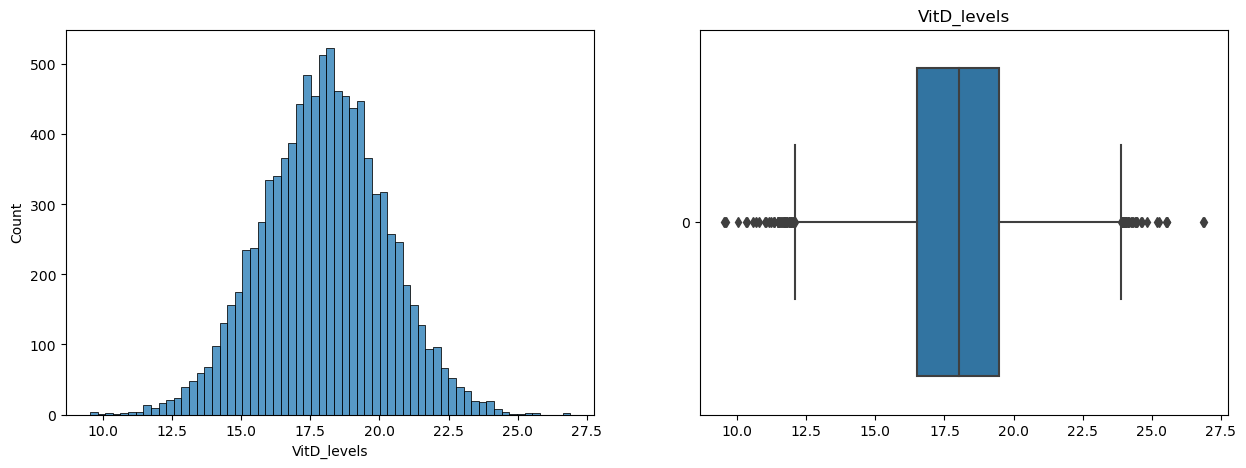

In [19]:
col='VitD_levels'
fig, axs = plt.subplots(1,2, figsize=(15,5))
seaborn.histplot(df[col], ax=axs[0])
plt.title(col)
seaborn.boxplot(df[col], orient='h', ax=axs[1])
plt.title(col)
plt.show()

#### Doc_visits

Normal distribution, no outliers

#### Full_meals_eaten

Right-skew distribution. Data dictionary indicates that more than 3 meals per day are sometimes requested by patients, so no need to remove these outliers.

#### Initial_days

Bimodal distribution. No outliers on box plot.

#### TotalCharge

Two disjoint bimodal distributions. I looked at various combinations of variables to explain this and found a correlation between the original faulty `VitD_levels` and the erroneous high `TotalCharge`. The bimodality is correlated to `ReAdmis`.

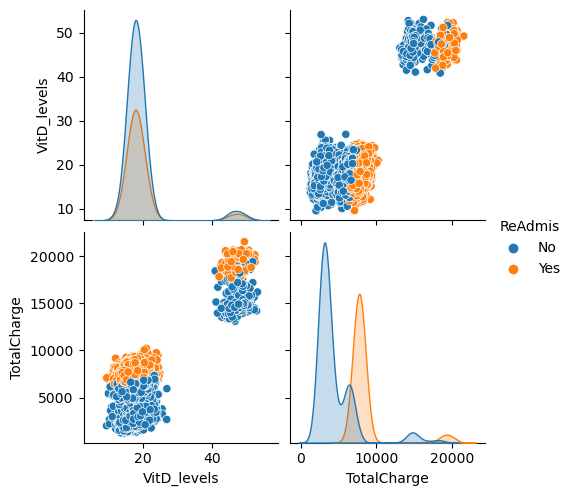

In [20]:
seaborn.pairplot(df_orig[['VitD_levels','TotalCharge','ReAdmis']], hue='ReAdmis')

As was done for `VitD_levels`, compare the two halves of the distribution

In [21]:
print(df.loc[(df['TotalCharge'] > 12000), 'TotalCharge'].describe())

print(df.loc[(df['TotalCharge'] < 12000), 'TotalCharge'].describe())

count      485.000000
mean     16992.011323
std       2232.496816
min      13090.407920
25%      14818.699630
50%      17194.577120
75%      19082.181300
max      21524.224210
Name: TotalCharge, dtype: float64
count     9212.000000
mean      5305.625810
std       2210.012295
min       1256.751699
25%       3206.018807
50%       5166.102356
75%       7446.089792
max      10223.333770
Name: TotalCharge, dtype: float64


Shift the upper distribution down by the difference in means

11686.38551226713
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: TotalCharge, dtype: float64
count     9697.000000
mean      5305.625810
std       2211.026177
min       1256.751699
25%       3201.385852
50%       5184.222274
75%       7441.743567
max      10223.333770
Name: TotalCharge, dtype: float64


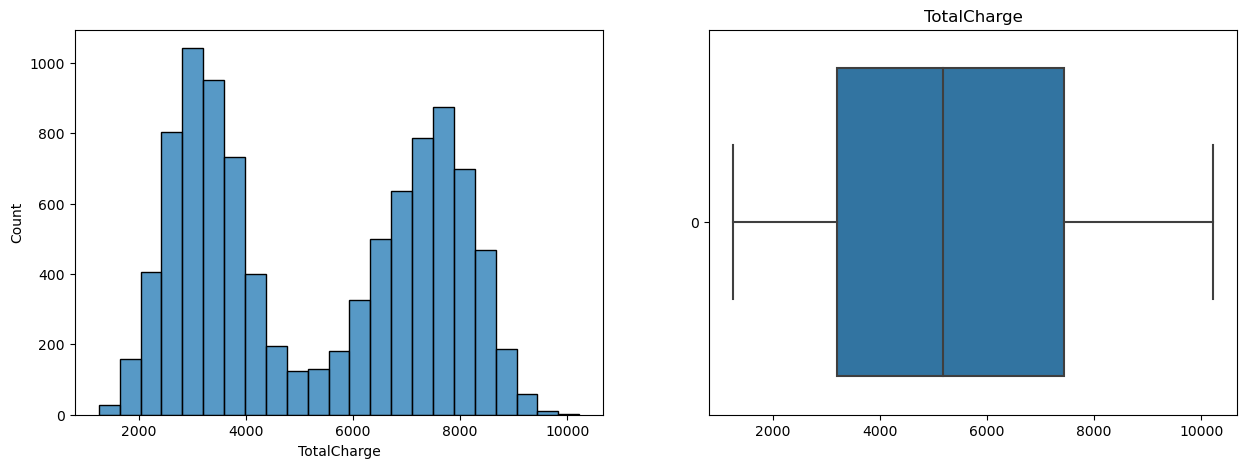

In [22]:
col='TotalCharge'
meandiff = (df.loc[(df[col] > 12000), col].mean()) - (df.loc[(df[col] < 12000), col].mean())
print(meandiff)

df[col]=np.where(df[col] > 12000, df[col] - meandiff, df[col])

#Check stats for revised distribution
print(df.loc[(df[col] > 12000), col].describe())
print(df.loc[(df[col] < 12000), col].describe())


fig, axs = plt.subplots(1,2, figsize=(15,5))
seaborn.histplot(df[col], ax=axs[0])
plt.title(col)
seaborn.boxplot(df[col], orient='h', ax=axs[1])
plt.title(col)
plt.show()

#### Additional_charges

Interesting relationship between `Age`, `Additional_charges`, and `HighBlood`, but no reason to exclude the outliers.

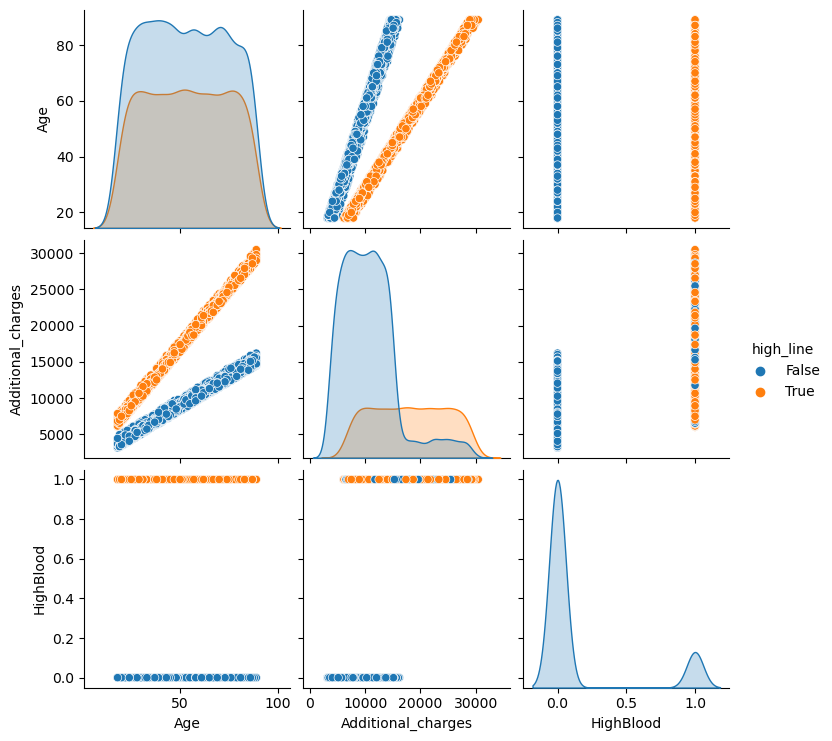

In [23]:
# This is a key to distinguish between the population at the top of the Age vs Additional_charges graph and those at the bottom
df['high_line'] = (df['Additional_charges']/(df['Age']+20) > 150)
seaborn.pairplot(df[['Age','Additional_charges','HighBlood','high_line']], hue='high_line')
df.drop('high_line', axis=1, inplace=True)

## Treating Missing Values

I will use MICE (`IterativeImputer`) from the `fancyimputer` package. First I will save a copy of the data frame now that I have removed outliers.
MICE code adapted from DataCamp (Donthi, n.d.).

In [24]:
df_outl_removed = df.copy(deep=True)

# For MICE technique, only use the part of the dataset with quantitative & ordinal categorical variables
# Reduce dataset to remove survey, ID variables, Job, Employment, Services, Marital, Gender, Initial_admin
dfr = df.iloc[:,14:]
dfr = dfr[[c for c in dfr.columns if not c.startswith('Item')]]
dfr.drop(columns=['Employment', 'Services', 'Marital', 'Gender', 'Initial_admin'], inplace=True)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9697 entries, 0 to 9998
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            7109 non-null   float64
 1   Age                 7353 non-null   float64
 2   Education           9697 non-null   int64  
 3   Income              7313 non-null   float64
 4   ReAdmis             9697 non-null   int64  
 5   VitD_levels         9697 non-null   float64
 6   Doc_visits          9697 non-null   int64  
 7   Full_meals_eaten    9697 non-null   int64  
 8   VitD_supp           9697 non-null   int64  
 9   Soft_drink          7301 non-null   float64
 10  HighBlood           9697 non-null   int64  
 11  Stroke              9697 non-null   int64  
 12  Complication_risk   9697 non-null   int64  
 13  Overweight          8751 non-null   float64
 14  Arthritis           9697 non-null   int64  
 15  Diabetes            9697 non-null   int64  
 16  Hyperl

In [25]:
# Install package if needed for environment (Vanderplas, 2017)
#import sys
#!{sys.executable} -m pip install fancyimpute
# MICE code adapted from Datacamp (Donthi, n.d.)
from fancyimpute import IterativeImputer
mice = IterativeImputer()
dfr_mice = dfr.copy(deep=True)
dfr_mice.iloc[:,:] = mice.fit_transform(dfr)

C:\Users\dough\AppData\Local\Temp\ipykernel_20364\534511612.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfr_mice.iloc[:,:] = mice.fit_transform(dfr)


In [26]:
# The variables with missing values were all encoded as integer - need to round of the float output of MICE
cols_with_missing = ['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']
dfr_mice[cols_with_missing] = dfr_mice[cols_with_missing].round()

# Some Initial_days values were imputed as negative - clamp to 1 as min value
dfr_mice[dfr_mice['Initial_days'] < 1] = 0
# Clamp minimum age to 20, maximum to 90 to match original data set
dfr_mice[dfr_mice['Age'] < 20] = 20
dfr_mice[dfr_mice['Age'] > 90] = 90

# Copy these back into larger data frame
df[cols_with_missing] = dfr_mice[cols_with_missing]

In [27]:
# Verify no columns have missing values
df.isna().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

<Axes: >

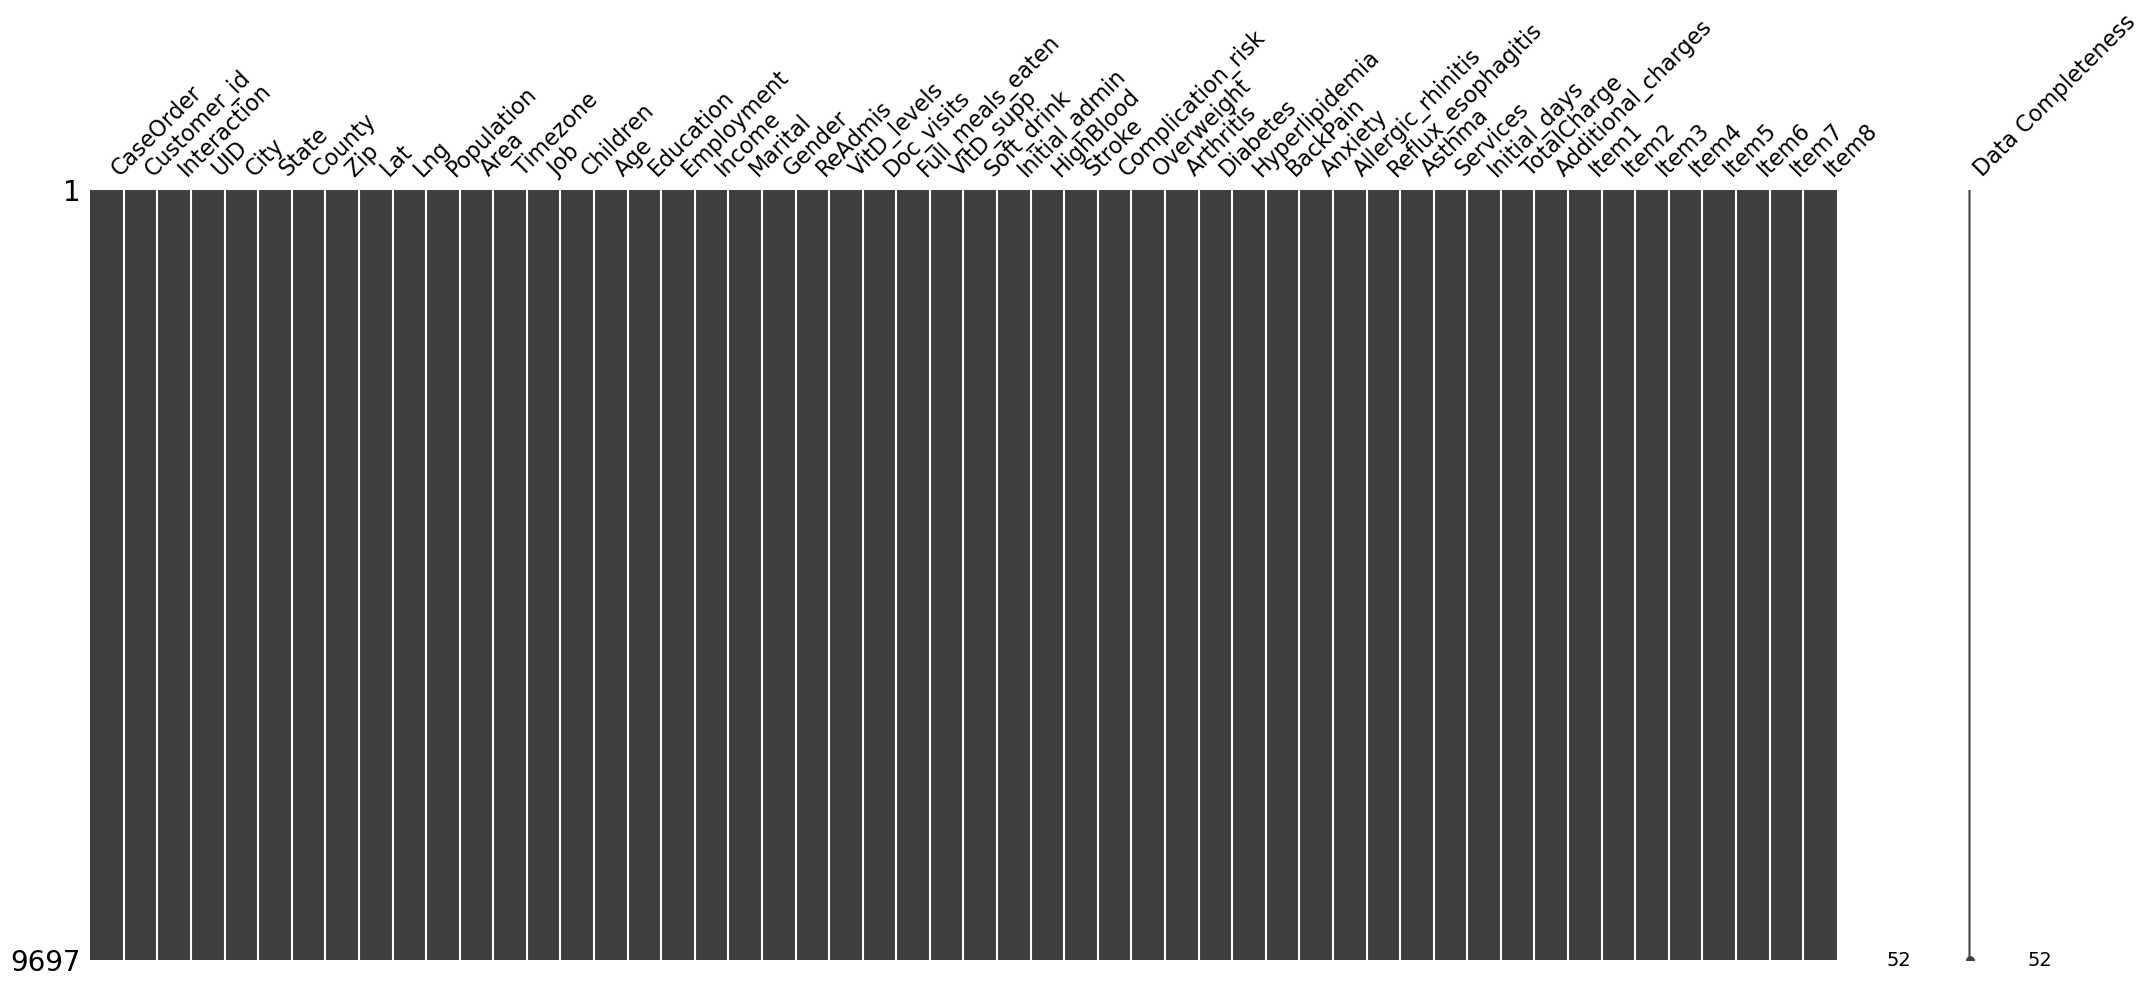

In [28]:
msno.matrix(df, labels=True)

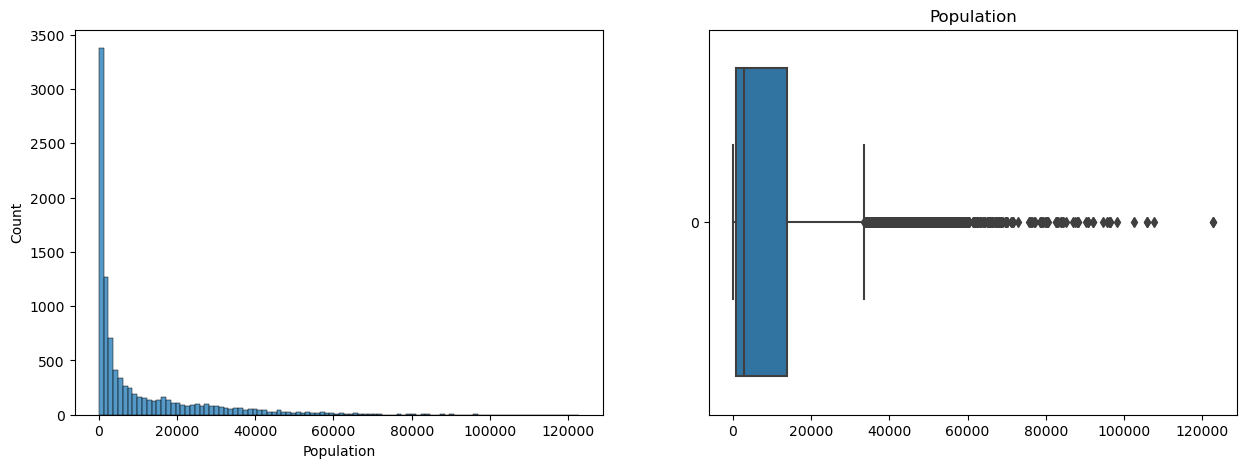

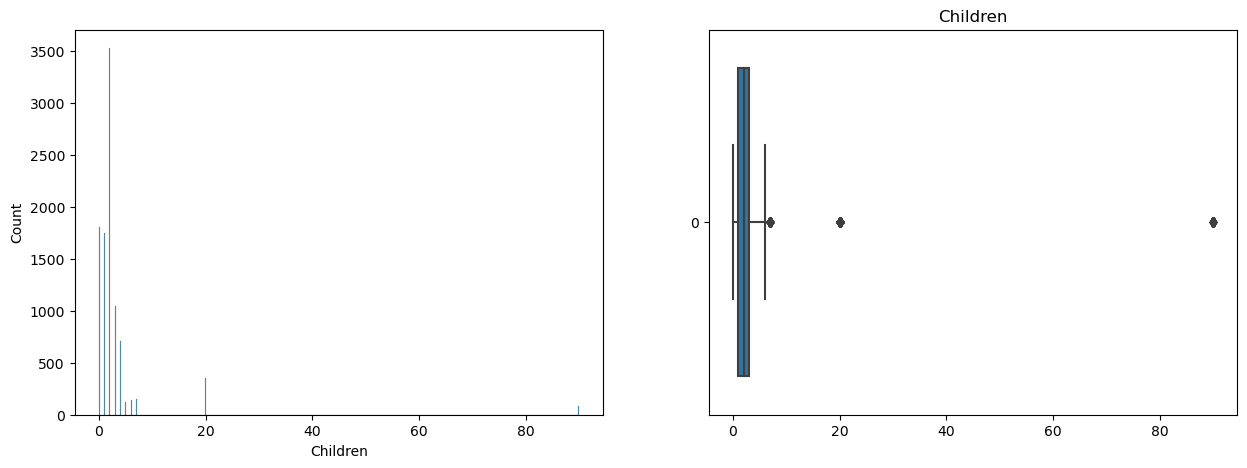

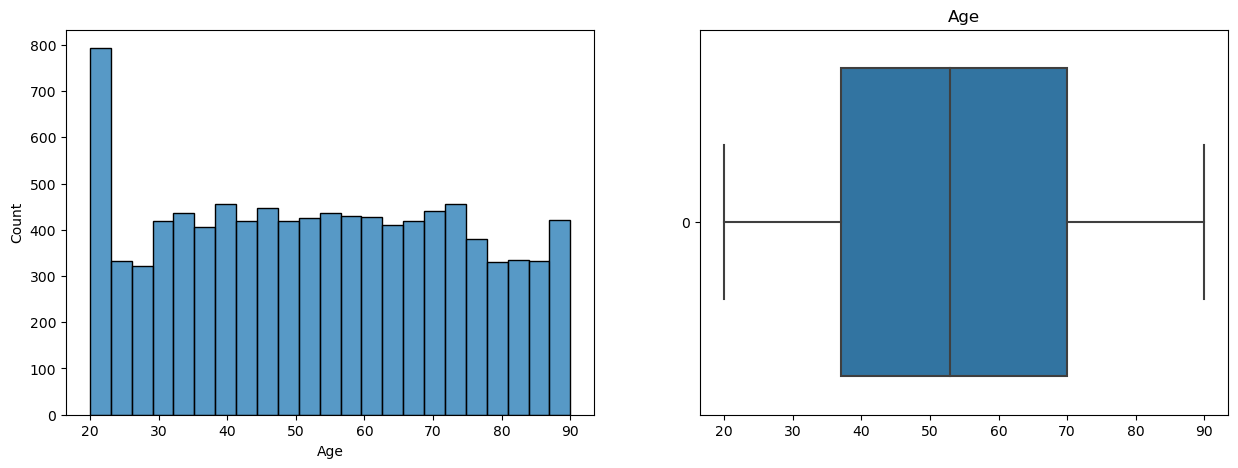

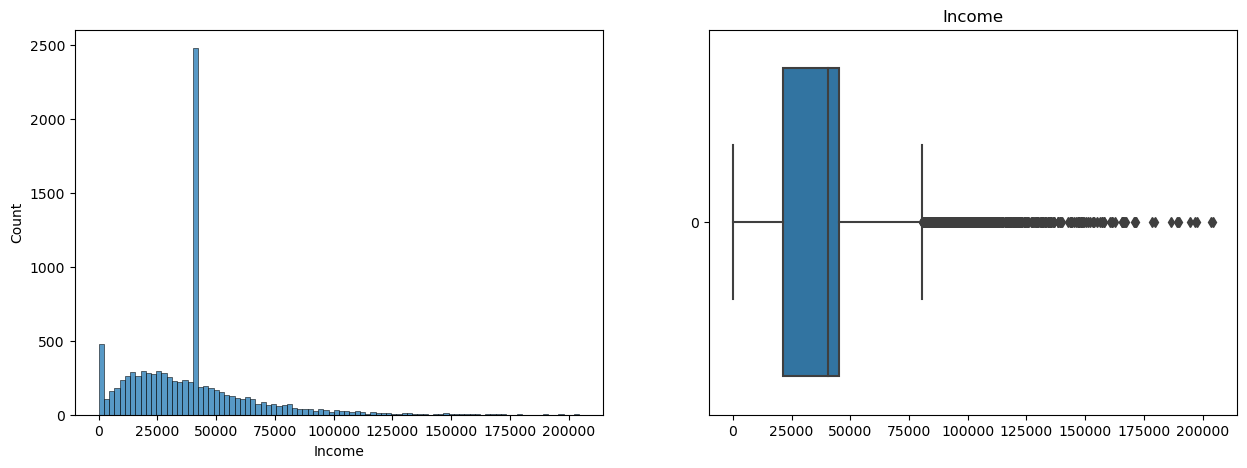

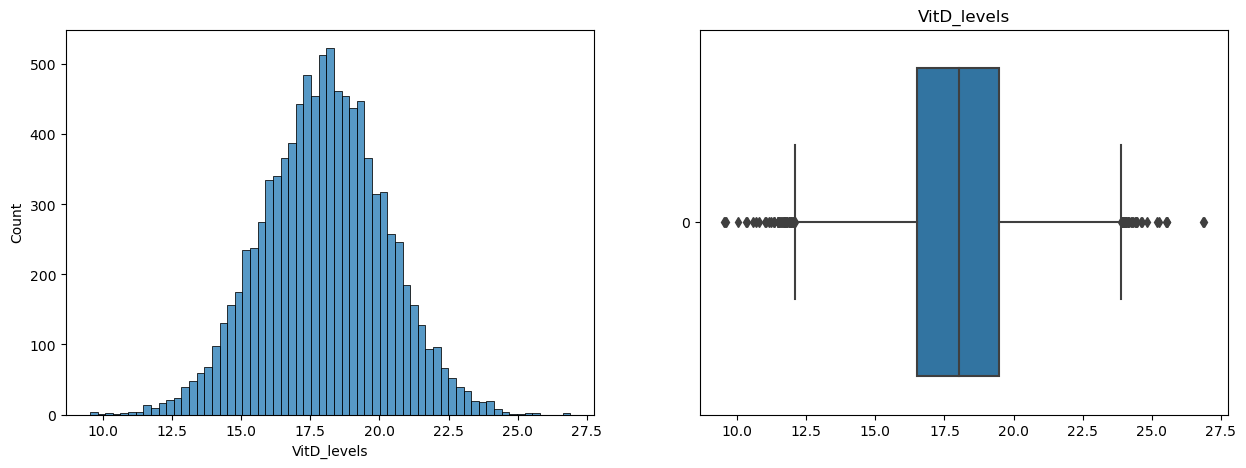

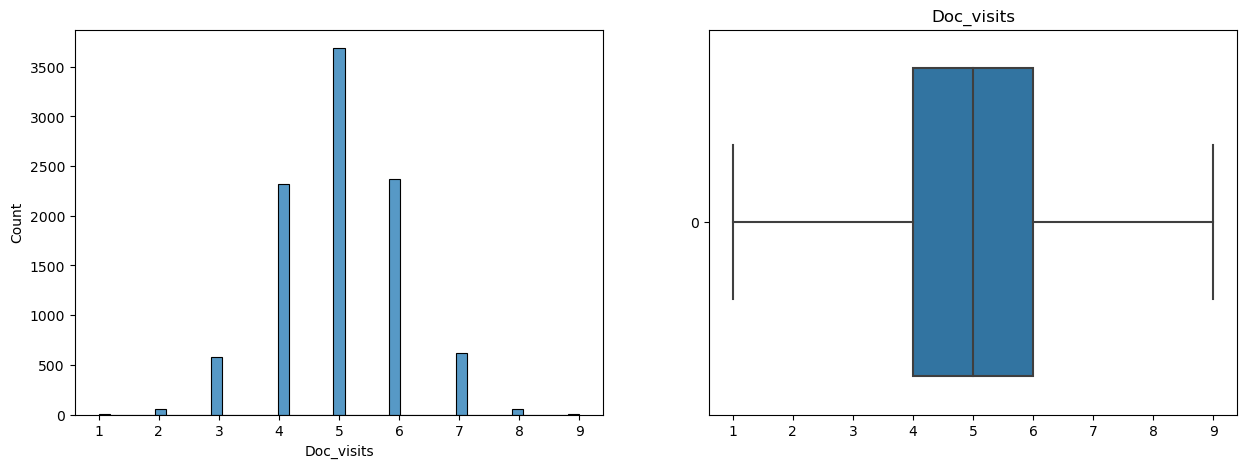

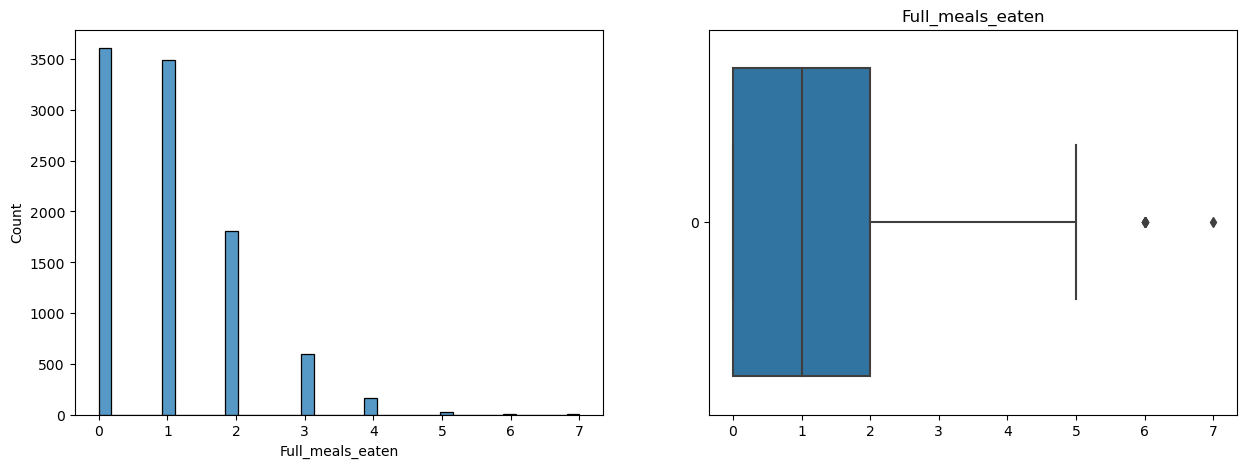

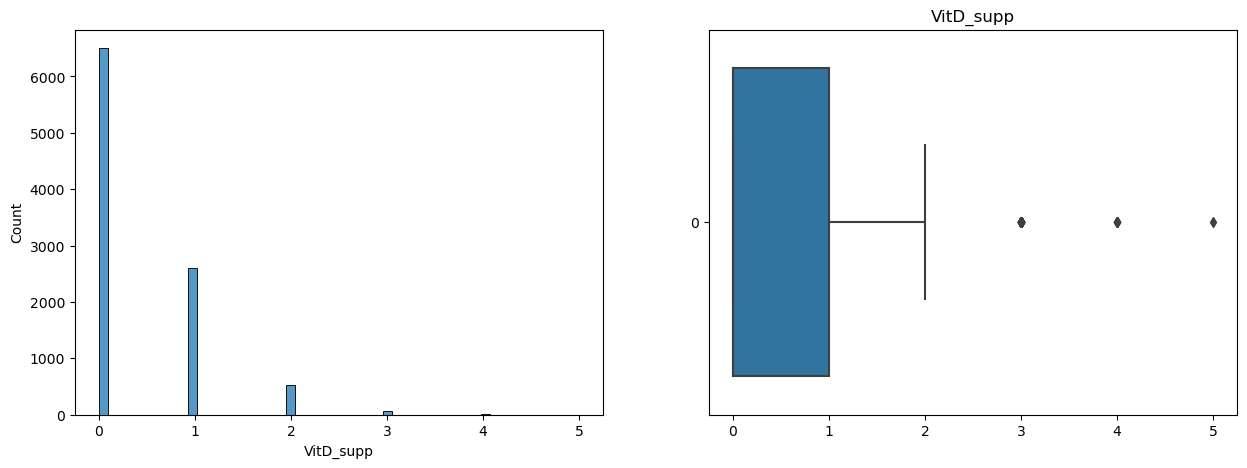

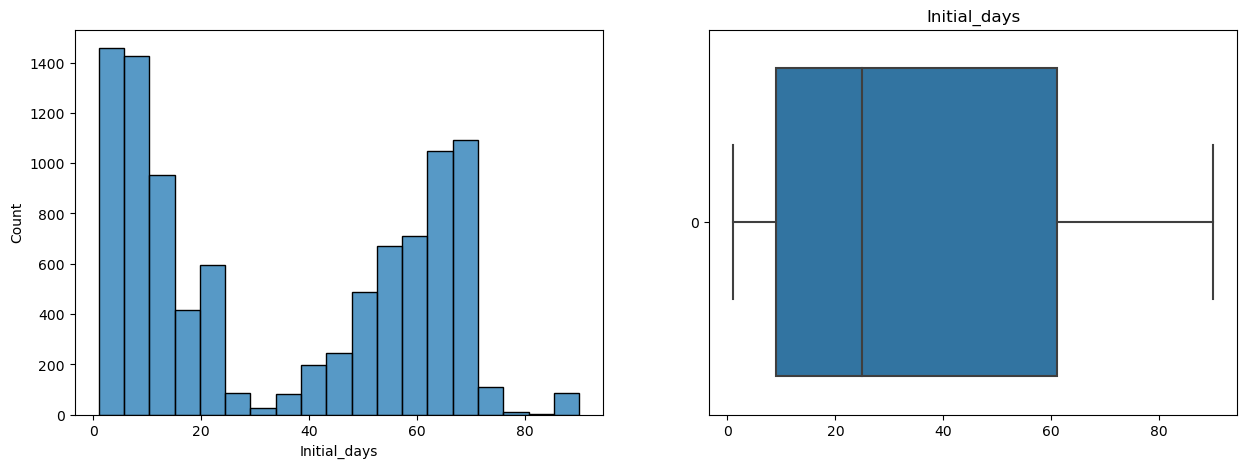

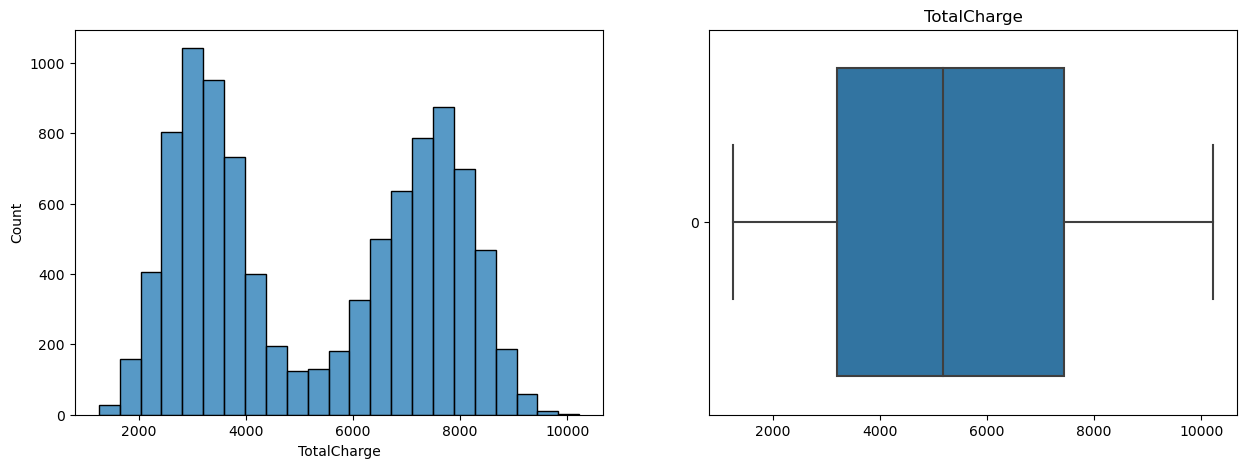

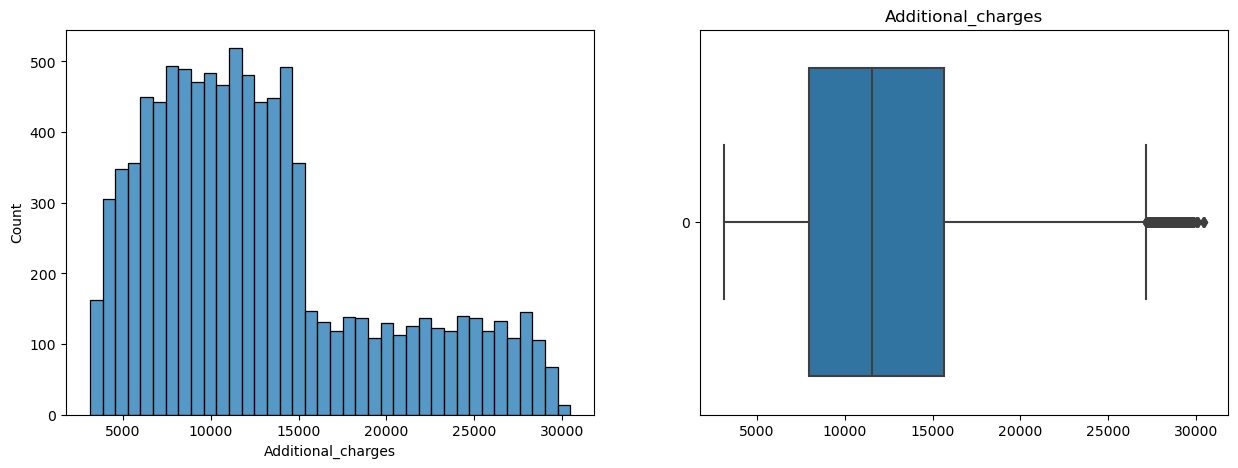

In [29]:
#Show data histograms / box plots after removal of unwanted outliers and imputation of missing values
for col in quant_cols:
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    seaborn.histplot(df[col], ax=axs[0])
    plt.title(col)
    seaborn.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

MICE introduced some odd outliers, and it was necessary to clamp output to restrict invalid values. I will also try KNN to see if the output produced is more sane.

In [30]:
# KNN code adapted from Datacamp (Donthi, n.d.)
from fancyimpute import KNN
knn = KNN()
dfr_knn = dfr.copy(deep=True)
dfr_knn.iloc[:,:] = knn.fit_transform(dfr)

Imputing row 1/9697 with 1 missing, elapsed time: 24.989
Imputing row 101/9697 with 2 missing, elapsed time: 24.998
Imputing row 201/9697 with 1 missing, elapsed time: 25.009
Imputing row 301/9697 with 1 missing, elapsed time: 25.017
Imputing row 401/9697 with 1 missing, elapsed time: 25.026
Imputing row 501/9697 with 2 missing, elapsed time: 25.034
Imputing row 601/9697 with 2 missing, elapsed time: 25.044
Imputing row 701/9697 with 2 missing, elapsed time: 25.052
Imputing row 801/9697 with 1 missing, elapsed time: 25.070
Imputing row 901/9697 with 2 missing, elapsed time: 25.078
Imputing row 1001/9697 with 1 missing, elapsed time: 25.089
Imputing row 1101/9697 with 0 missing, elapsed time: 25.101
Imputing row 1201/9697 with 0 missing, elapsed time: 25.111
Imputing row 1301/9697 with 0 missing, elapsed time: 25.119
Imputing row 1401/9697 with 0 missing, elapsed time: 25.134
Imputing row 1501/9697 with 2 missing, elapsed time: 25.144
Imputing row 1601/9697 with 1 missing, elapsed time:

C:\Users\dough\AppData\Local\Temp\ipykernel_20364\1396394363.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfr_knn.iloc[:,:] = knn.fit_transform(dfr)


In [31]:
dfr_knn.head(20)

,Children,Age,Education,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges
0,1.000000,53.000000,12.0,86575.930000,0.0,17.802330,6.0,0.0,0.0,0.264118,...,1.0,0.0,1.0,1.000000,1.0,0.0,1.0,10.585770,3191.048774,17939.403420
1,3.000000,51.000000,13.0,46805.990000,0.0,18.994640,4.0,2.0,1.0,0.000000,...,0.0,0.0,0.0,0.587370,0.0,1.0,0.0,15.129562,4214.905346,17612.998120
2,3.000000,53.000000,13.0,14370.140000,0.0,17.415889,4.0,1.0,0.0,0.000000,...,1.0,0.0,0.0,0.503272,0.0,0.0,0.0,4.772177,2177.586768,17505.192460
3,0.000000,78.000000,12.0,39741.490000,0.0,17.420079,4.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.962932,0.0,1.0,1.0,1.714879,2465.118965,12993.437350
4,1.027426,22.000000,12.0,1209.560000,0.0,16.870524,5.0,0.0,2.0,1.000000,...,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,1.254807,1885.655137,3716.525786
5,1.790722,76.000000,12.0,34836.782242,0.0,19.956143,6.0,0.0,0.0,0.000000,...,1.0,0.0,1.0,0.000000,1.0,0.0,0.0,5.957250,2774.089920,12742.589910
6,0.000000,50.000000,16.0,10456.050000,0.0,14.348350,6.0,0.0,0.0,0.039657,...,1.0,1.0,1.0,1.000000,0.0,1.0,0.0,9.058210,3533.292197,16815.513600
7,7.000000,40.000000,18.0,32314.215178,0.0,20.425926,7.0,2.0,0.0,0.651982,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,12.270218,3316.400250,6930.572138
8,1.532535,48.000000,12.0,55586.480000,0.0,19.539212,6.0,3.0,0.0,0.000000,...,0.0,1.0,0.0,0.370738,0.0,0.0,0.0,6.180339,2922.759667,8363.187290
9,2.000000,78.000000,13.0,38965.220000,0.0,19.628554,7.0,1.0,2.0,0.000000,...,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.632554,3709.547665,26225.989910


In [32]:
# The variables with missing values were all encoded as integer - need to round of the float output of KNN
cols_with_missing = ['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']
dfr_knn[cols_with_missing] = dfr_knn[cols_with_missing].round()

# Some Initial_days values were imputed as negative - clamp to 1 as min value
#dfr_knn[dfr_knn['Initial_days'] < 1] = 0
# Clamp minimum age to 20, maximum to 90 to match original data set
#dfr_knn[dfr_knn['Age'] < 20] = 20
#dfr_knn[dfr_knn['Age'] > 90] = 90

# Copy these back into larger data frame
df[cols_with_missing] = dfr_knn[cols_with_missing]

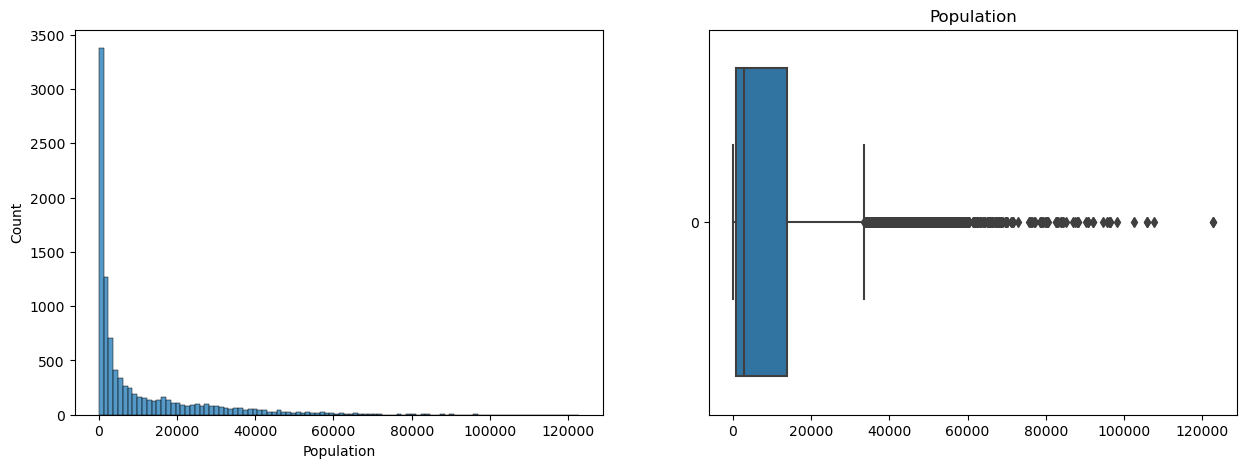

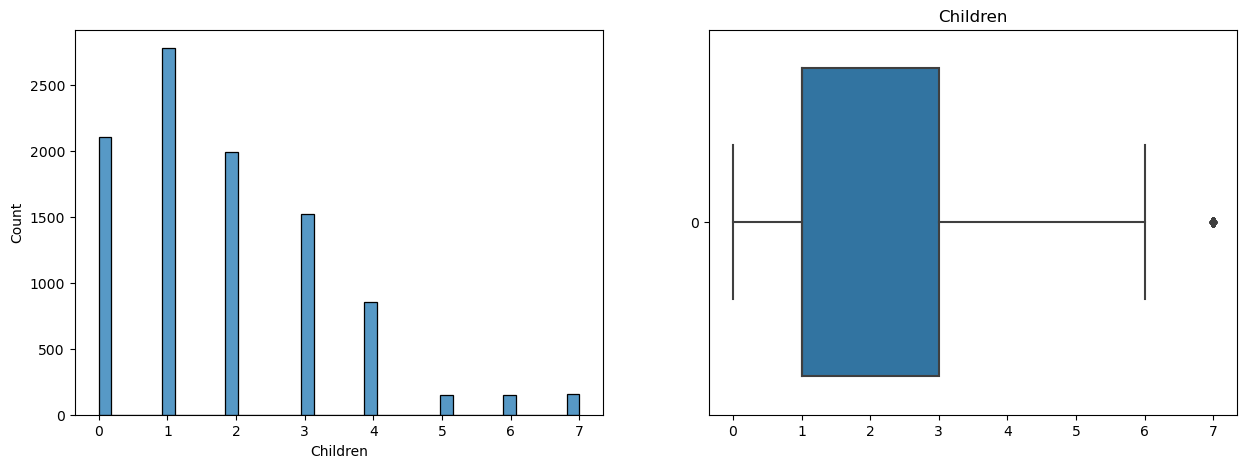

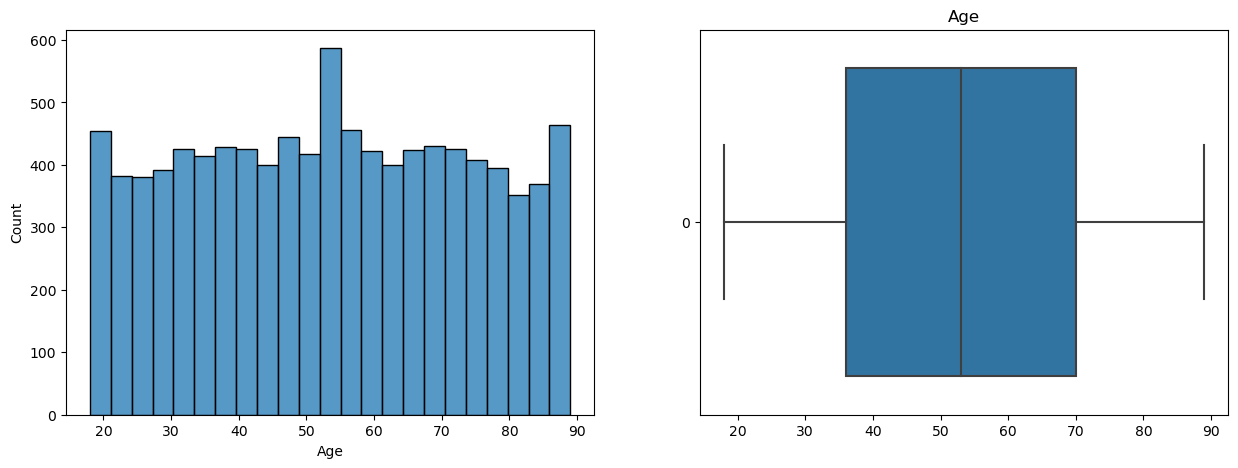

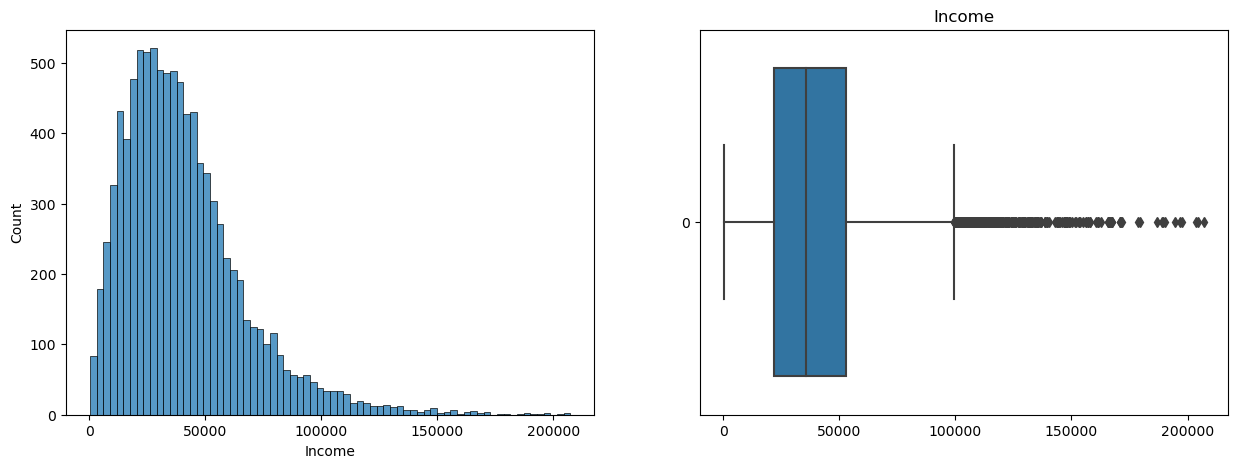

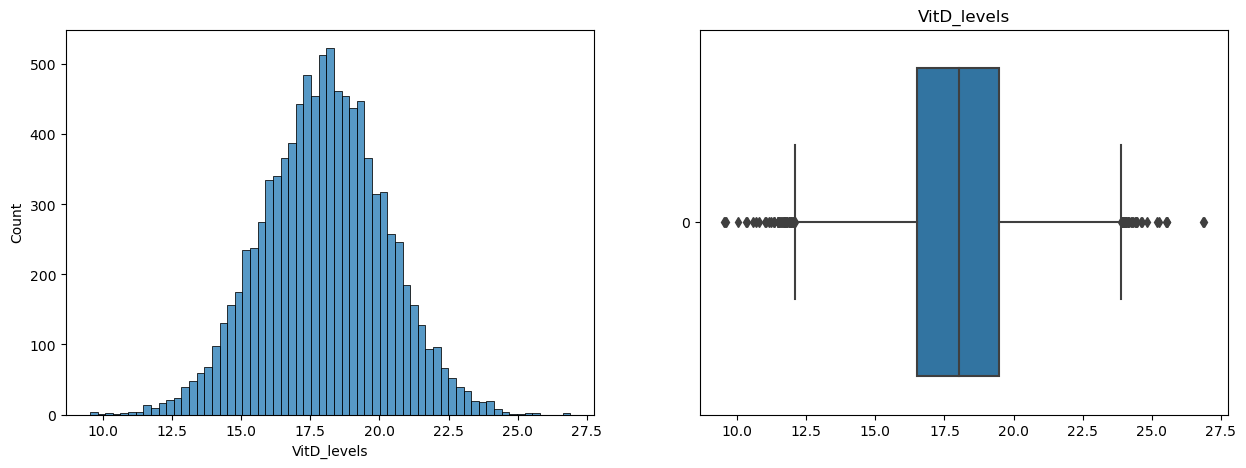

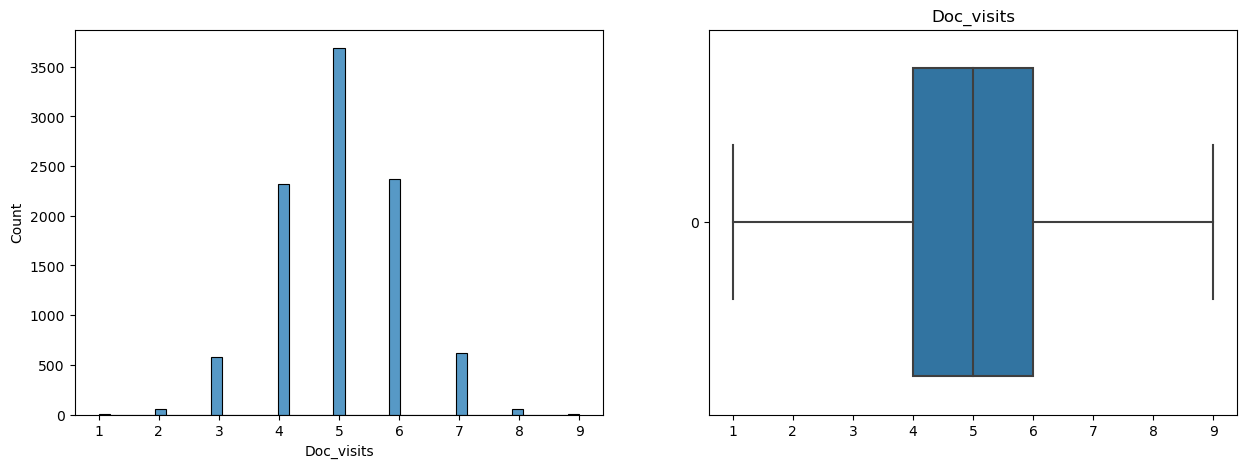

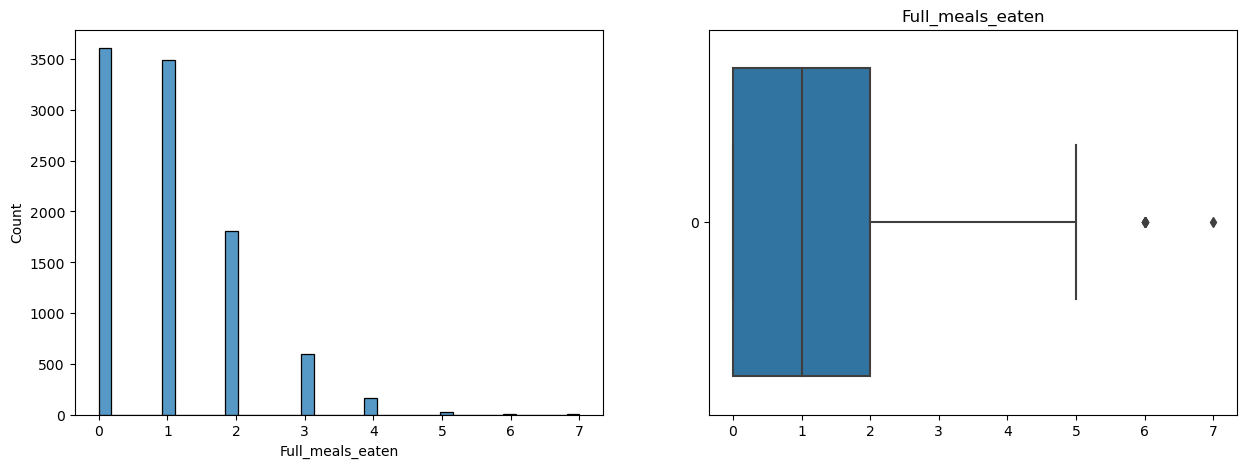

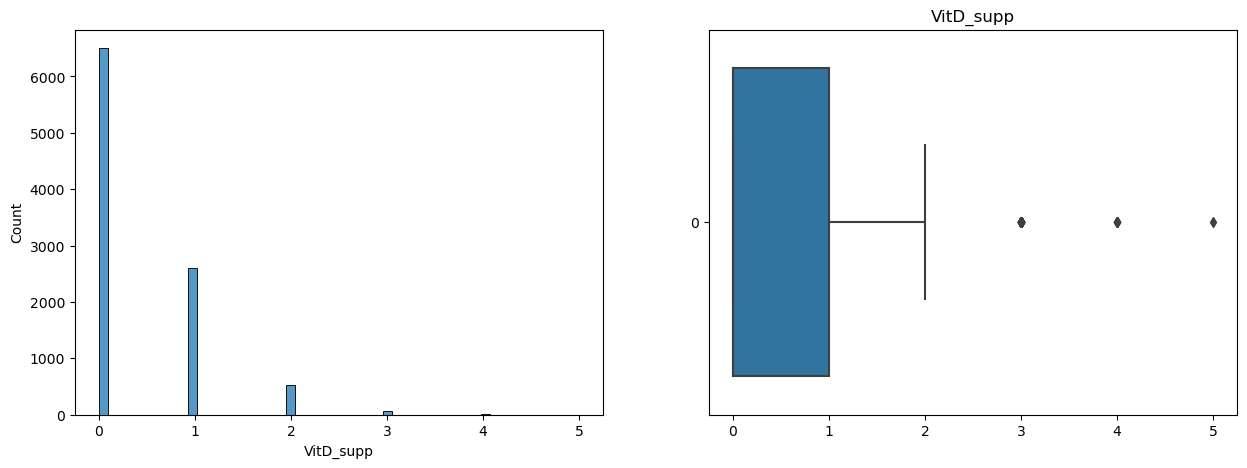

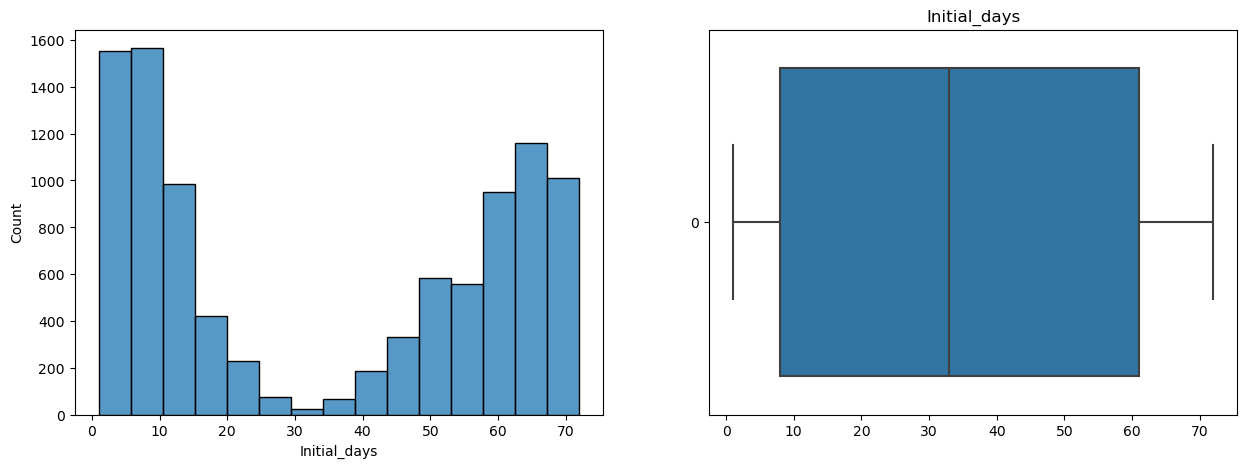

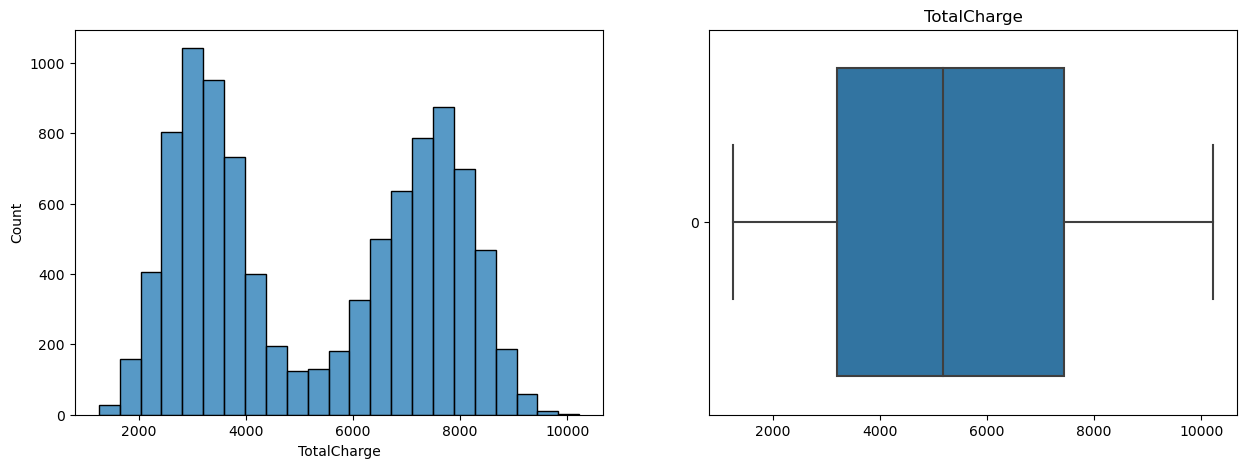

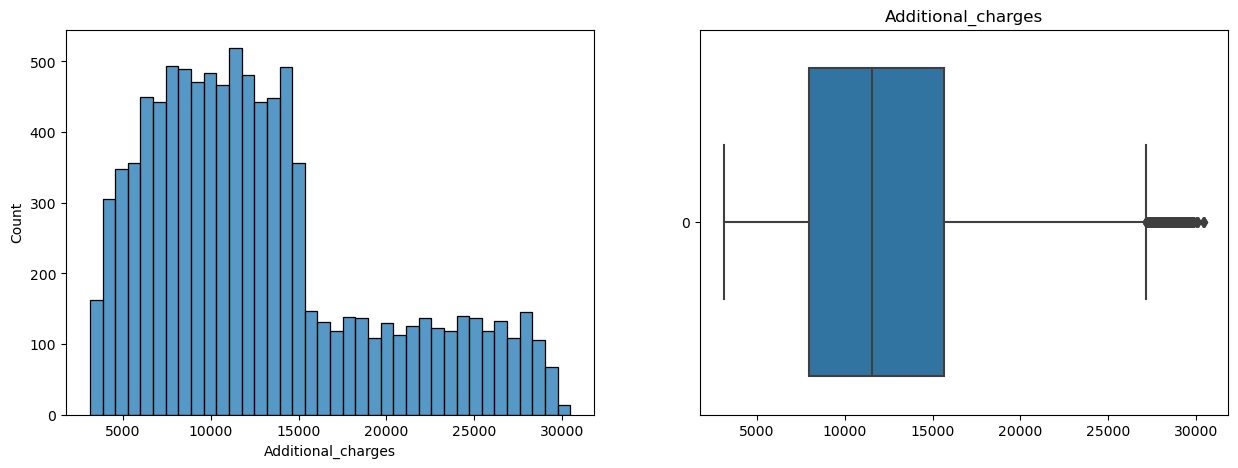

In [33]:
#Show data histograms / box plots after removal of unwanted outliers and imputation of missing values
for col in quant_cols:
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    seaborn.histplot(df[col], ax=axs[0])
    plt.title(col)
    seaborn.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

Outliers look reasonable, no out-of-bounds data - stay with KNN.

In [34]:
# Output dataframes to CSV files
df.to_csv('clean_medical_data.csv', index=False)
chil_outliers.to_csv('children_outliers.csv', index=False)

# Principal Component Analysis

Code reference: Datacamp (Boeye, n.d.), WGU Course material (Middleton, n.d., _PCA_)

In [35]:
# Import packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
# Only work with the 5 continuous quantitative variables, plus the 2 discrete with a large variation (Age, Population)
quant_cols_7 = ['Population', 'Age', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']
dfq = df[quant_cols_7]

# Normalize the variables
scaler = StandardScaler()
dfq_std = scaler.fit_transform(dfq)

# Perform PCA
pca = PCA()
pc = pca.fit_transform(dfq_std)

# Start with 7 principal components since there are 7 variables
pc_cols = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
pc_df = pd.DataFrame(pc, columns = pc_cols)

# Show explained variance per PC
print(pca.explained_variance_ratio_)

# Show loadings on each PC
loadings = pd.DataFrame(pca.components_, columns = pc_cols, index = dfq.columns)
print(loadings)

[0.28263554 0.24762722 0.14454051 0.14290044 0.14105104 0.03770498
 0.00354027]
                         PC1       PC2       PC3       PC4       PC5  \
Population          0.017968  0.084907 -0.021941  0.047780  0.698793   
Age                -0.022144  0.701733 -0.004102  0.021696 -0.095542   
Income              0.701513  0.001759  0.699437  0.134877 -0.009981   
VitD_levels        -0.056437 -0.017467 -0.133912  0.986333 -0.071269   
Initial_days        0.709743  0.004673 -0.701653 -0.055454 -0.017739   
TotalCharge         0.012020  0.706716  0.006285 -0.000961  0.033393   
Additional_charges  0.000706 -0.024185 -0.000396  0.055911  0.704238   

                         PC6       PC7  
Population          0.701983  0.092799  
Age                -0.083392  0.700365  
Income              0.001910  0.019202  
VitD_levels         0.006433 -0.024579  
Initial_days       -0.020617  0.010492  
TotalCharge        -0.025421 -0.706121  
Additional_charges -0.706505  0.034467  


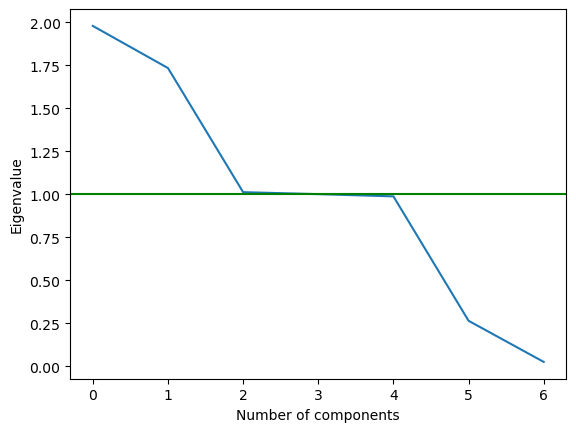

[1.9784487717585597, 1.7333905187730823, 1.0117835651016736, 1.0003030980153926, 0.9873572679103336, 0.26393489021634664, 0.02478188822461117]
[0.28263554 0.53026276 0.67480327 0.81770371 0.95875475 0.99645973
 1.        ]


In [37]:
# Code reference: Getting Started with PCA (Middleton, n.d.)

cov_matrix = np.dot(dfq_std.T, dfq_std) / dfq.shape[0]
eigenvals = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvals)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalue')
plt.axhline (y=1, color='green')
plt.show()

print(eigenvals)
print(pca.explained_variance_ratio_.cumsum())